In [2]:
# Essential library imports for handling data, machine learning models, and plotting
import os
import random
import numpy as np
from tensorflow import keras
# import pandas as pd
import tqdm
# import multiprocessing
from matplotlib import pyplot as plt  # Add this line for plotting
import re
from IPython.core.display import HTML

In [3]:
# Define paths to the working directories and data
current_directory = os.getcwd()
WORKING_DIR = os.path.join(current_directory, "..")

PATH_DATA = os.path.join(WORKING_DIR, "Data") 

PATH_TESTING_DATA = os.path.join(PATH_DATA, "3_data_npy_test")
WHEEL = "Wheel1"
PATH_TESTING_DATA = os.path.join(PATH_TESTING_DATA, WHEEL)
PATH_MODELS_PARENT = os.path.join(PATH_DATA, "models")



In [3]:
INPUT_SIZE = 52 # Fixed input size for the models
PATH_MODELS =os.path.join(PATH_MODELS_PARENT,f"models_seq_{INPUT_SIZE}/")

# Load and prepare models for evaluation
model_lst = [file for file in os.listdir(PATH_MODELS) if 'best'  in file]
for i in tqdm.tqdm(range(len(model_lst))):
    myname = model_lst[i]
    model_lst[i] = keras.models.load_model(PATH_MODELS+myname)
    model_lst[i].myname = myname

print(len(model_lst))

100%|██████████| 26/26 [00:17<00:00,  1.46it/s]

26


In [4]:
# Prepare the testing data file list
filelist = os.listdir(PATH_TESTING_DATA)

# Pairing x and y files
filelist = [
    (x, y) for x in filelist if 'x_' in x
    for y in filelist if x.split('_')[1] == y.split('_')[1]
    and "y_" in y
]

# Function to extract numeric parts from filenames for sorting
def extract_numbers(filename):
    # Extracting numbers after 'overlaps' and 'non-shared-lugs'
    matches = re.findall(r'non-shared-lugs(\d+)-overlaps(\d+)', filename)
    if matches:
        # Converts string numbers to integer tuple
        return tuple(map(int, matches[0]))
    return (0, 0)  # Default return value if no numbers found

# Sorting based on the numeric values extracted from filenames
filelist.sort(key=lambda x: extract_numbers(x[0]))  # sorting by the first file's numbers


In [5]:
print(len(filelist))

103


In [6]:
def sample_data(x):
    """Randomly sample data to a manageable size."""
    total_samples = len(x)
    sample_size = total_samples;
    if total_samples > 1000:
        sample_size = 1000;
#    sample_size = min(sample_size, total_samples)
    indices = np.random.choice(total_samples, sample_size, replace=False)
    return x[indices], y[indices]

def compute_predictions(x, model_lst):
    """Compute model predictions for a given dataset."""
    all_predictions = []

    for model in model_lst:
        model_predictions = model.predict(x).round()  # Round predictions to 0 or 1
        all_predictions.append(model_predictions.flatten())

    return np.array(all_predictions).T  # Transpose so that each row represents a sample

def count_correct_predictions(all_predictions, y):
     """Count the number of correct predictions per sample."""
    correct_counts = []

    for i in range(len(x)):
        correct_count = 0
        for j, model in enumerate(model_lst):
            if all_predictions[i][j] == y[i][int(model.myname.split('_')[-1].split('.')[0])]:
                correct_count += 1
        correct_counts.append(correct_count)

    return correct_counts

Mean Accuracy: 52.33%
Median Accuracy: 53.85%


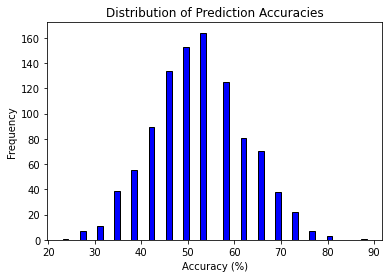

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.80%
Accuracy range: 30% - 40%, Frequency: 10.50%
Accuracy range: 40% - 50%, Frequency: 22.30%
Accuracy range: 50% - 60%, Frequency: 44.20%
Accuracy range: 60% - 70%, Frequency: 18.90%
Accuracy range: 70% - 80%, Frequency: 2.90%
Accuracy range: 80% - 90%, Frequency: 0.40%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 51.36%
Median Accuracy: 50.00%


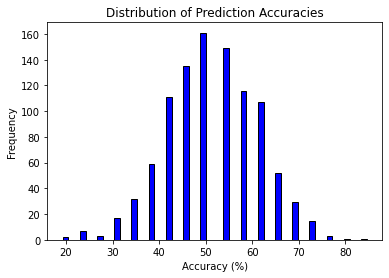

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.20%
Accuracy range: 20% - 30%, Frequency: 1.00%
Accuracy range: 30% - 40%, Frequency: 10.80%
Accuracy range: 40% - 50%, Frequency: 24.60%
Accuracy range: 50% - 60%, Frequency: 42.60%
Accuracy range: 60% - 70%, Frequency: 18.80%
Accuracy range: 70% - 80%, Frequency: 1.80%
Accuracy range: 80% - 90%, Frequency: 0.20%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 53.66%
Median Accuracy: 53.85%


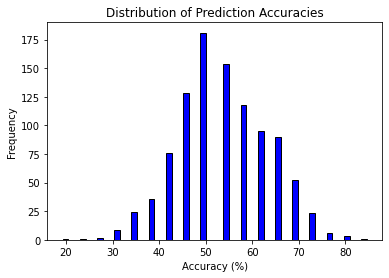

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.10%
Accuracy range: 20% - 30%, Frequency: 0.30%
Accuracy range: 30% - 40%, Frequency: 6.90%
Accuracy range: 40% - 50%, Frequency: 20.40%
Accuracy range: 50% - 60%, Frequency: 45.30%
Accuracy range: 60% - 70%, Frequency: 23.70%
Accuracy range: 70% - 80%, Frequency: 2.90%
Accuracy range: 80% - 90%, Frequency: 0.40%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 56.27%
Median Accuracy: 57.69%


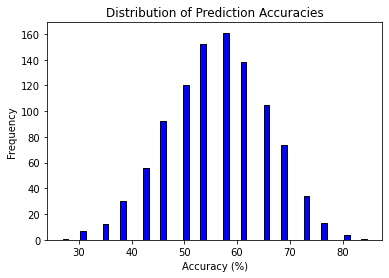

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 4.90%
Accuracy range: 40% - 50%, Frequency: 14.80%
Accuracy range: 50% - 60%, Frequency: 43.30%
Accuracy range: 60% - 70%, Frequency: 31.70%
Accuracy range: 70% - 80%, Frequency: 4.70%
Accuracy range: 80% - 90%, Frequency: 0.50%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 57.80%
Median Accuracy: 57.69%


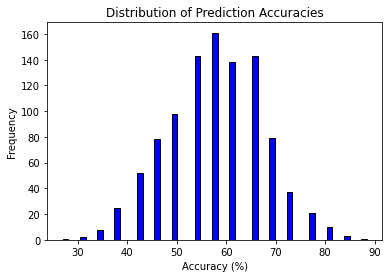

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 3.50%
Accuracy range: 40% - 50%, Frequency: 13.00%
Accuracy range: 50% - 60%, Frequency: 40.20%
Accuracy range: 60% - 70%, Frequency: 36.00%
Accuracy range: 70% - 80%, Frequency: 5.80%
Accuracy range: 80% - 90%, Frequency: 1.40%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 59.47%
Median Accuracy: 59.62%


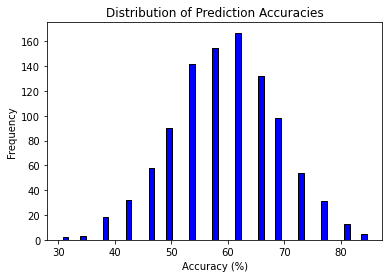

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 2.30%
Accuracy range: 40% - 50%, Frequency: 9.00%
Accuracy range: 50% - 60%, Frequency: 38.70%
Accuracy range: 60% - 70%, Frequency: 39.70%
Accuracy range: 70% - 80%, Frequency: 8.50%
Accuracy range: 80% - 90%, Frequency: 1.80%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 60.43%
Median Accuracy: 61.54%


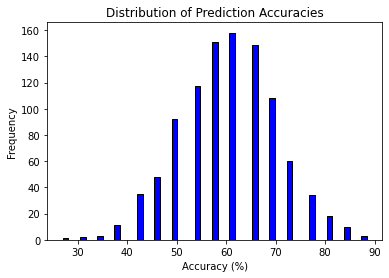

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 1.60%
Accuracy range: 40% - 50%, Frequency: 8.30%
Accuracy range: 50% - 60%, Frequency: 36.00%
Accuracy range: 60% - 70%, Frequency: 41.50%
Accuracy range: 70% - 80%, Frequency: 9.40%
Accuracy range: 80% - 90%, Frequency: 3.10%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 61.82%
Median Accuracy: 61.54%


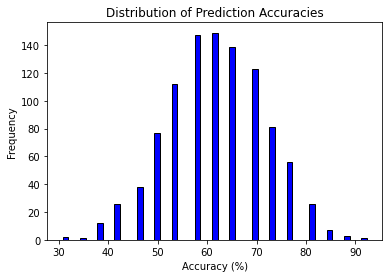

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 1.50%
Accuracy range: 40% - 50%, Frequency: 6.40%
Accuracy range: 50% - 60%, Frequency: 33.60%
Accuracy range: 60% - 70%, Frequency: 41.10%
Accuracy range: 70% - 80%, Frequency: 13.70%
Accuracy range: 80% - 90%, Frequency: 3.60%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 63.43%
Median Accuracy: 65.38%


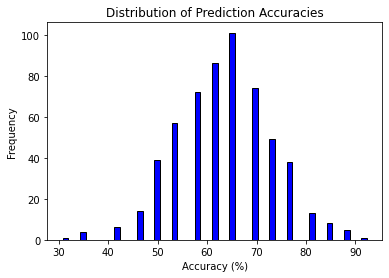

Number of tested sequences of this type: 568.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.88%
Accuracy range: 40% - 50%, Frequency: 3.52%
Accuracy range: 50% - 60%, Frequency: 29.58%
Accuracy range: 60% - 70%, Frequency: 45.95%
Accuracy range: 70% - 80%, Frequency: 15.32%
Accuracy range: 80% - 90%, Frequency: 4.58%
Accuracy range: 90% - 100%, Frequency: 0.18%


Mean Accuracy: 64.54%
Median Accuracy: 65.38%


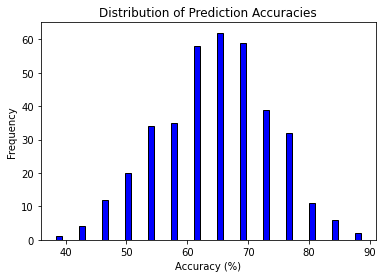

Number of tested sequences of this type: 375.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.27%
Accuracy range: 40% - 50%, Frequency: 4.27%
Accuracy range: 50% - 60%, Frequency: 23.73%
Accuracy range: 60% - 70%, Frequency: 47.73%
Accuracy range: 70% - 80%, Frequency: 18.93%
Accuracy range: 80% - 90%, Frequency: 5.07%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 66.28%
Median Accuracy: 65.38%


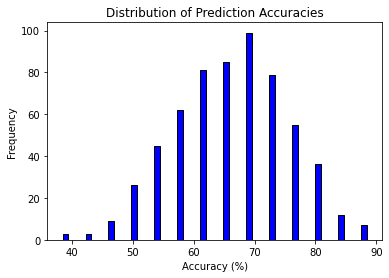

Number of tested sequences of this type: 602.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.50%
Accuracy range: 40% - 50%, Frequency: 1.99%
Accuracy range: 50% - 60%, Frequency: 22.09%
Accuracy range: 60% - 70%, Frequency: 44.02%
Accuracy range: 70% - 80%, Frequency: 22.26%
Accuracy range: 80% - 90%, Frequency: 9.14%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 68.96%
Median Accuracy: 69.23%


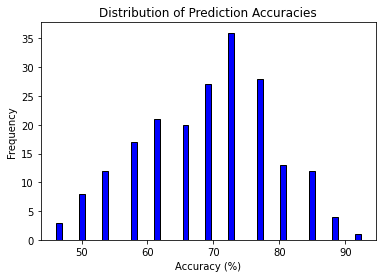

Number of tested sequences of this type: 202.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 1.49%
Accuracy range: 50% - 60%, Frequency: 18.32%
Accuracy range: 60% - 70%, Frequency: 33.66%
Accuracy range: 70% - 80%, Frequency: 31.68%
Accuracy range: 80% - 90%, Frequency: 14.36%
Accuracy range: 90% - 100%, Frequency: 0.50%


Mean Accuracy: 54.69%
Median Accuracy: 53.85%


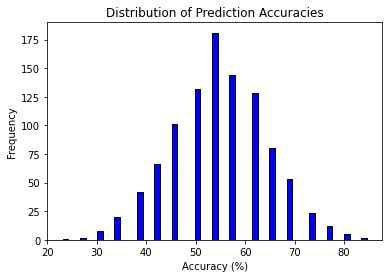

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.30%
Accuracy range: 30% - 40%, Frequency: 7.00%
Accuracy range: 40% - 50%, Frequency: 16.70%
Accuracy range: 50% - 60%, Frequency: 45.70%
Accuracy range: 60% - 70%, Frequency: 26.10%
Accuracy range: 70% - 80%, Frequency: 3.50%
Accuracy range: 80% - 90%, Frequency: 0.70%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 54.05%
Median Accuracy: 53.85%


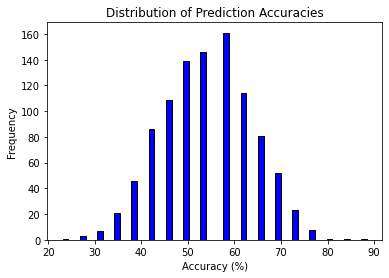

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.40%
Accuracy range: 30% - 40%, Frequency: 7.40%
Accuracy range: 40% - 50%, Frequency: 19.50%
Accuracy range: 50% - 60%, Frequency: 44.60%
Accuracy range: 60% - 70%, Frequency: 24.70%
Accuracy range: 70% - 80%, Frequency: 3.10%
Accuracy range: 80% - 90%, Frequency: 0.30%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 55.70%
Median Accuracy: 57.69%


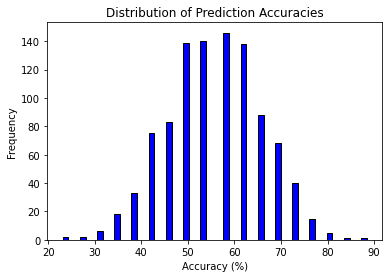

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.40%
Accuracy range: 30% - 40%, Frequency: 5.70%
Accuracy range: 40% - 50%, Frequency: 15.80%
Accuracy range: 50% - 60%, Frequency: 42.50%
Accuracy range: 60% - 70%, Frequency: 29.40%
Accuracy range: 70% - 80%, Frequency: 5.50%
Accuracy range: 80% - 90%, Frequency: 0.70%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 57.16%
Median Accuracy: 57.69%


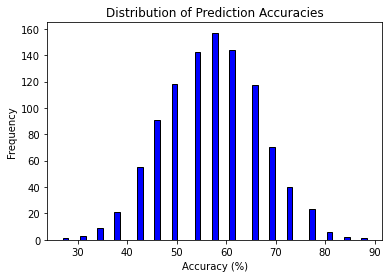

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 3.30%
Accuracy range: 40% - 50%, Frequency: 14.60%
Accuracy range: 50% - 60%, Frequency: 41.70%
Accuracy range: 60% - 70%, Frequency: 33.10%
Accuracy range: 70% - 80%, Frequency: 6.30%
Accuracy range: 80% - 90%, Frequency: 0.90%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 59.70%
Median Accuracy: 61.54%


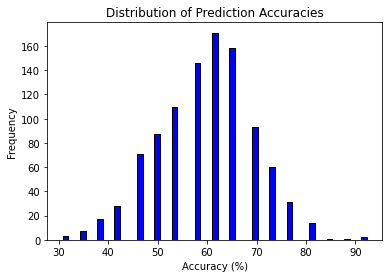

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 2.70%
Accuracy range: 40% - 50%, Frequency: 9.90%
Accuracy range: 50% - 60%, Frequency: 34.30%
Accuracy range: 60% - 70%, Frequency: 42.20%
Accuracy range: 70% - 80%, Frequency: 9.10%
Accuracy range: 80% - 90%, Frequency: 1.60%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 61.80%
Median Accuracy: 61.54%


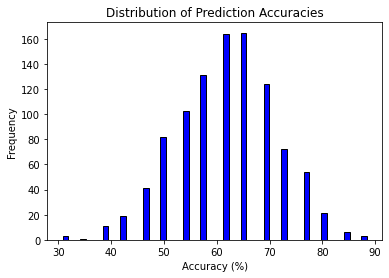

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 1.50%
Accuracy range: 40% - 50%, Frequency: 6.00%
Accuracy range: 50% - 60%, Frequency: 31.60%
Accuracy range: 60% - 70%, Frequency: 45.30%
Accuracy range: 70% - 80%, Frequency: 12.60%
Accuracy range: 80% - 90%, Frequency: 3.00%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 62.77%
Median Accuracy: 61.54%


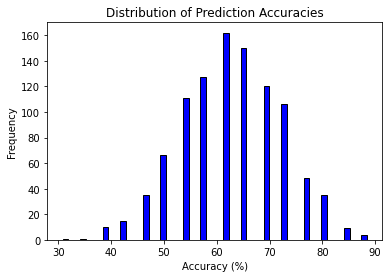

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 1.20%
Accuracy range: 40% - 50%, Frequency: 5.00%
Accuracy range: 50% - 60%, Frequency: 30.40%
Accuracy range: 60% - 70%, Frequency: 43.20%
Accuracy range: 70% - 80%, Frequency: 15.40%
Accuracy range: 80% - 90%, Frequency: 4.80%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 64.67%
Median Accuracy: 65.38%


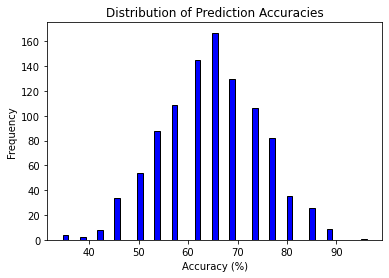

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.60%
Accuracy range: 40% - 50%, Frequency: 4.20%
Accuracy range: 50% - 60%, Frequency: 25.10%
Accuracy range: 60% - 70%, Frequency: 44.20%
Accuracy range: 70% - 80%, Frequency: 18.80%
Accuracy range: 80% - 90%, Frequency: 7.00%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 65.28%
Median Accuracy: 65.38%


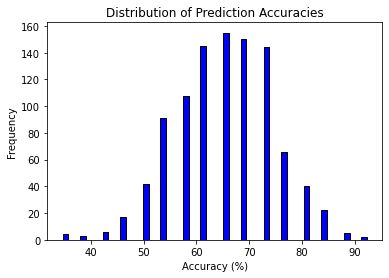

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.70%
Accuracy range: 40% - 50%, Frequency: 2.30%
Accuracy range: 50% - 60%, Frequency: 24.10%
Accuracy range: 60% - 70%, Frequency: 45.00%
Accuracy range: 70% - 80%, Frequency: 21.00%
Accuracy range: 80% - 90%, Frequency: 6.70%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 67.00%
Median Accuracy: 65.38%


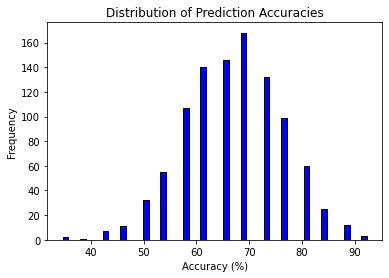

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 1.80%
Accuracy range: 50% - 60%, Frequency: 19.40%
Accuracy range: 60% - 70%, Frequency: 45.40%
Accuracy range: 70% - 80%, Frequency: 23.10%
Accuracy range: 80% - 90%, Frequency: 9.70%
Accuracy range: 90% - 100%, Frequency: 0.30%


Mean Accuracy: 68.63%
Median Accuracy: 69.23%


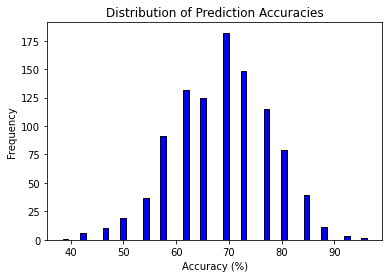

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 1.60%
Accuracy range: 50% - 60%, Frequency: 14.70%
Accuracy range: 60% - 70%, Frequency: 43.90%
Accuracy range: 70% - 80%, Frequency: 26.30%
Accuracy range: 80% - 90%, Frequency: 12.90%
Accuracy range: 90% - 100%, Frequency: 0.50%


Mean Accuracy: 69.76%
Median Accuracy: 69.23%


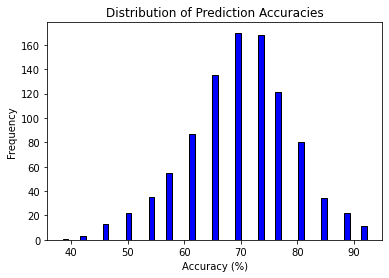

Number of tested sequences of this type: 957.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 1.67%
Accuracy range: 50% - 60%, Frequency: 11.70%
Accuracy range: 60% - 70%, Frequency: 40.96%
Accuracy range: 70% - 80%, Frequency: 30.20%
Accuracy range: 80% - 90%, Frequency: 14.21%
Accuracy range: 90% - 100%, Frequency: 1.15%


Mean Accuracy: 72.34%
Median Accuracy: 73.08%


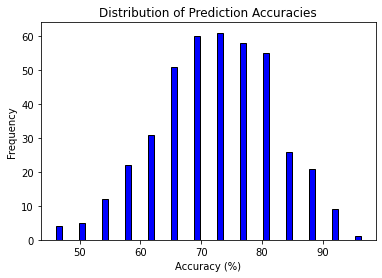

Number of tested sequences of this type: 416.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.96%
Accuracy range: 50% - 60%, Frequency: 9.38%
Accuracy range: 60% - 70%, Frequency: 34.13%
Accuracy range: 70% - 80%, Frequency: 28.61%
Accuracy range: 80% - 90%, Frequency: 24.52%
Accuracy range: 90% - 100%, Frequency: 2.40%


Mean Accuracy: 55.45%
Median Accuracy: 57.69%


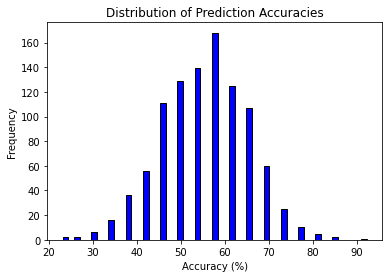

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.40%
Accuracy range: 30% - 40%, Frequency: 5.80%
Accuracy range: 40% - 50%, Frequency: 16.70%
Accuracy range: 50% - 60%, Frequency: 43.60%
Accuracy range: 60% - 70%, Frequency: 29.20%
Accuracy range: 70% - 80%, Frequency: 3.50%
Accuracy range: 80% - 90%, Frequency: 0.70%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 56.95%
Median Accuracy: 57.69%


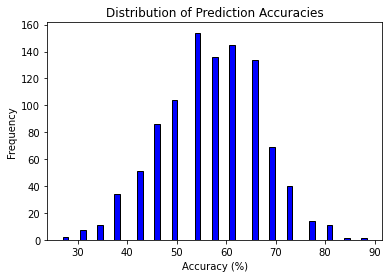

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.20%
Accuracy range: 30% - 40%, Frequency: 5.20%
Accuracy range: 40% - 50%, Frequency: 13.70%
Accuracy range: 50% - 60%, Frequency: 39.40%
Accuracy range: 60% - 70%, Frequency: 34.80%
Accuracy range: 70% - 80%, Frequency: 5.40%
Accuracy range: 80% - 90%, Frequency: 1.30%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 59.07%
Median Accuracy: 57.69%


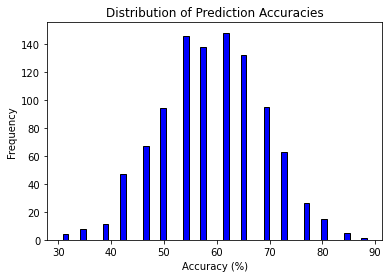

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 2.30%
Accuracy range: 40% - 50%, Frequency: 11.40%
Accuracy range: 50% - 60%, Frequency: 37.80%
Accuracy range: 60% - 70%, Frequency: 37.50%
Accuracy range: 70% - 80%, Frequency: 8.90%
Accuracy range: 80% - 90%, Frequency: 2.10%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 61.60%
Median Accuracy: 61.54%


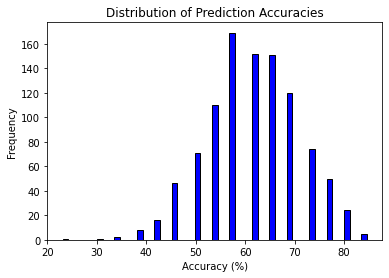

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 1.10%
Accuracy range: 40% - 50%, Frequency: 6.20%
Accuracy range: 50% - 60%, Frequency: 35.00%
Accuracy range: 60% - 70%, Frequency: 42.30%
Accuracy range: 70% - 80%, Frequency: 12.40%
Accuracy range: 80% - 90%, Frequency: 2.90%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 63.22%
Median Accuracy: 65.38%


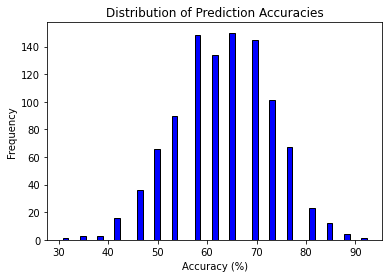

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.70%
Accuracy range: 40% - 50%, Frequency: 5.20%
Accuracy range: 50% - 60%, Frequency: 30.40%
Accuracy range: 60% - 70%, Frequency: 42.90%
Accuracy range: 70% - 80%, Frequency: 16.80%
Accuracy range: 80% - 90%, Frequency: 3.90%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 64.18%
Median Accuracy: 65.38%


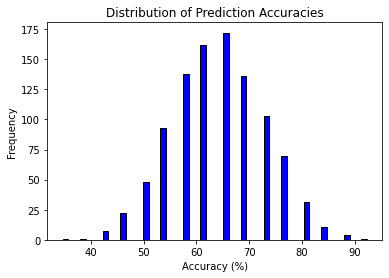

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 2.90%
Accuracy range: 50% - 60%, Frequency: 27.90%
Accuracy range: 60% - 70%, Frequency: 47.00%
Accuracy range: 70% - 80%, Frequency: 17.30%
Accuracy range: 80% - 90%, Frequency: 4.60%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 66.29%
Median Accuracy: 65.38%


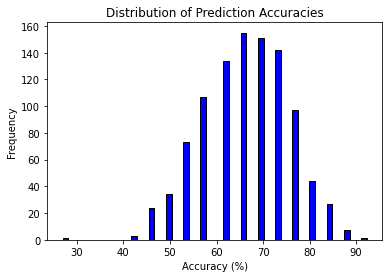

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 2.70%
Accuracy range: 50% - 60%, Frequency: 21.40%
Accuracy range: 60% - 70%, Frequency: 44.00%
Accuracy range: 70% - 80%, Frequency: 23.90%
Accuracy range: 80% - 90%, Frequency: 7.80%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 67.57%
Median Accuracy: 69.23%


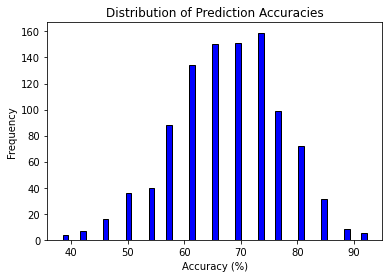

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.40%
Accuracy range: 40% - 50%, Frequency: 2.30%
Accuracy range: 50% - 60%, Frequency: 16.40%
Accuracy range: 60% - 70%, Frequency: 43.50%
Accuracy range: 70% - 80%, Frequency: 25.80%
Accuracy range: 80% - 90%, Frequency: 11.10%
Accuracy range: 90% - 100%, Frequency: 0.50%


Mean Accuracy: 68.43%
Median Accuracy: 69.23%


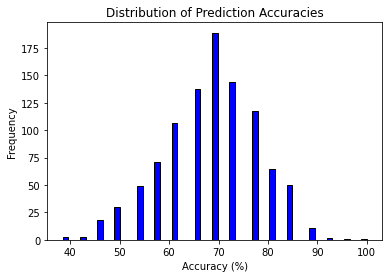

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 2.10%
Accuracy range: 50% - 60%, Frequency: 15.00%
Accuracy range: 60% - 70%, Frequency: 43.40%
Accuracy range: 70% - 80%, Frequency: 26.20%
Accuracy range: 80% - 90%, Frequency: 12.60%
Accuracy range: 90% - 100%, Frequency: 0.40%


Mean Accuracy: 69.32%
Median Accuracy: 69.23%


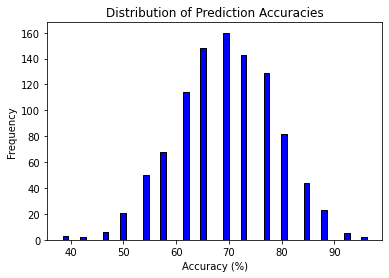

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 0.80%
Accuracy range: 50% - 60%, Frequency: 13.90%
Accuracy range: 60% - 70%, Frequency: 42.20%
Accuracy range: 70% - 80%, Frequency: 27.20%
Accuracy range: 80% - 90%, Frequency: 14.90%
Accuracy range: 90% - 100%, Frequency: 0.70%


Mean Accuracy: 70.69%
Median Accuracy: 69.23%


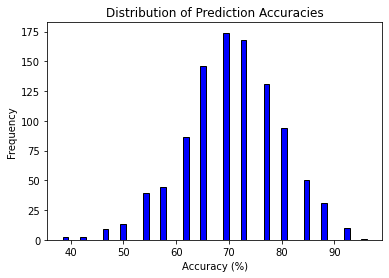

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 1.10%
Accuracy range: 50% - 60%, Frequency: 9.60%
Accuracy range: 60% - 70%, Frequency: 40.60%
Accuracy range: 70% - 80%, Frequency: 29.90%
Accuracy range: 80% - 90%, Frequency: 17.50%
Accuracy range: 90% - 100%, Frequency: 1.10%


Mean Accuracy: 72.63%
Median Accuracy: 73.08%


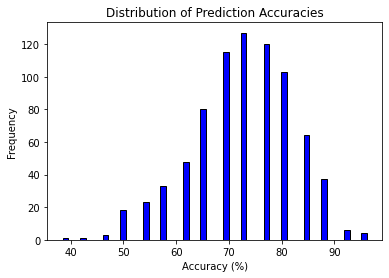

Number of tested sequences of this type: 783.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.13%
Accuracy range: 40% - 50%, Frequency: 0.51%
Accuracy range: 50% - 60%, Frequency: 9.45%
Accuracy range: 60% - 70%, Frequency: 31.03%
Accuracy range: 70% - 80%, Frequency: 31.55%
Accuracy range: 80% - 90%, Frequency: 26.05%
Accuracy range: 90% - 100%, Frequency: 1.28%


Mean Accuracy: 59.46%
Median Accuracy: 57.69%


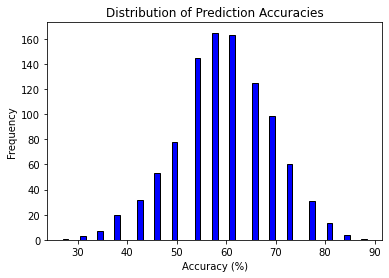

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 3.00%
Accuracy range: 40% - 50%, Frequency: 8.50%
Accuracy range: 50% - 60%, Frequency: 38.80%
Accuracy range: 60% - 70%, Frequency: 38.70%
Accuracy range: 70% - 80%, Frequency: 9.10%
Accuracy range: 80% - 90%, Frequency: 1.80%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 60.67%
Median Accuracy: 61.54%


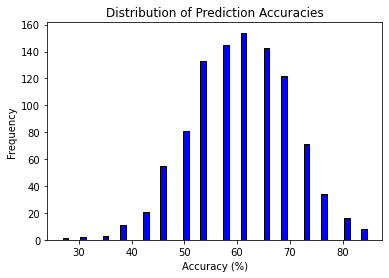

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 1.60%
Accuracy range: 40% - 50%, Frequency: 7.60%
Accuracy range: 50% - 60%, Frequency: 35.90%
Accuracy range: 60% - 70%, Frequency: 41.90%
Accuracy range: 70% - 80%, Frequency: 10.50%
Accuracy range: 80% - 90%, Frequency: 2.40%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 62.32%
Median Accuracy: 61.54%


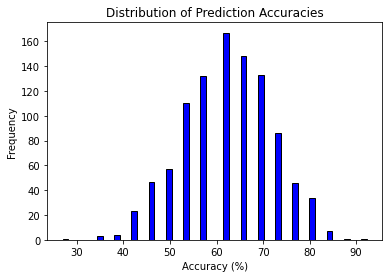

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 0.70%
Accuracy range: 40% - 50%, Frequency: 7.00%
Accuracy range: 50% - 60%, Frequency: 29.90%
Accuracy range: 60% - 70%, Frequency: 44.80%
Accuracy range: 70% - 80%, Frequency: 13.20%
Accuracy range: 80% - 90%, Frequency: 4.20%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 64.22%
Median Accuracy: 65.38%


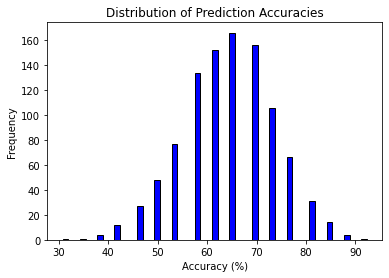

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.60%
Accuracy range: 40% - 50%, Frequency: 3.90%
Accuracy range: 50% - 60%, Frequency: 25.90%
Accuracy range: 60% - 70%, Frequency: 47.40%
Accuracy range: 70% - 80%, Frequency: 17.20%
Accuracy range: 80% - 90%, Frequency: 4.90%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 66.47%
Median Accuracy: 65.38%


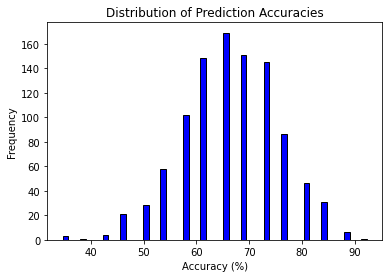

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.40%
Accuracy range: 40% - 50%, Frequency: 2.50%
Accuracy range: 50% - 60%, Frequency: 18.80%
Accuracy range: 60% - 70%, Frequency: 46.80%
Accuracy range: 70% - 80%, Frequency: 23.10%
Accuracy range: 80% - 90%, Frequency: 8.30%
Accuracy range: 90% - 100%, Frequency: 0.10%


Mean Accuracy: 68.55%
Median Accuracy: 69.23%


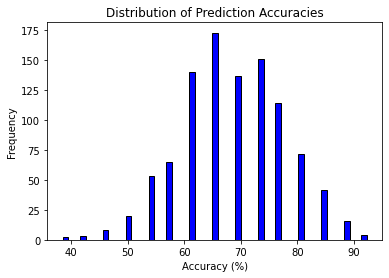

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 1.10%
Accuracy range: 50% - 60%, Frequency: 13.80%
Accuracy range: 60% - 70%, Frequency: 45.00%
Accuracy range: 70% - 80%, Frequency: 26.50%
Accuracy range: 80% - 90%, Frequency: 13.00%
Accuracy range: 90% - 100%, Frequency: 0.40%


Mean Accuracy: 69.50%
Median Accuracy: 69.23%


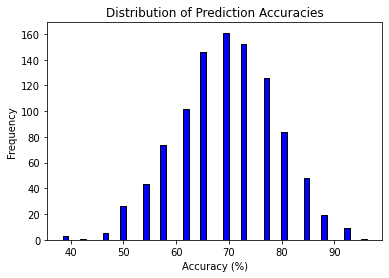

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 0.60%
Accuracy range: 50% - 60%, Frequency: 14.30%
Accuracy range: 60% - 70%, Frequency: 40.90%
Accuracy range: 70% - 80%, Frequency: 27.80%
Accuracy range: 80% - 90%, Frequency: 15.10%
Accuracy range: 90% - 100%, Frequency: 1.00%


Mean Accuracy: 70.85%
Median Accuracy: 73.08%


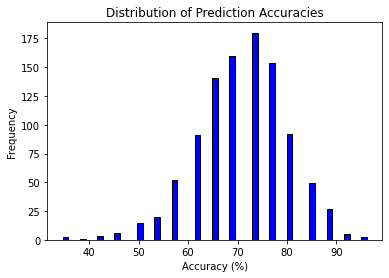

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 0.90%
Accuracy range: 50% - 60%, Frequency: 8.70%
Accuracy range: 60% - 70%, Frequency: 39.20%
Accuracy range: 70% - 80%, Frequency: 33.40%
Accuracy range: 80% - 90%, Frequency: 16.80%
Accuracy range: 90% - 100%, Frequency: 0.70%


Mean Accuracy: 72.17%
Median Accuracy: 73.08%


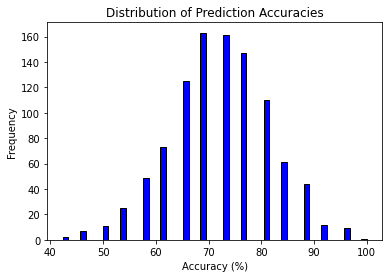

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.90%
Accuracy range: 50% - 60%, Frequency: 8.50%
Accuracy range: 60% - 70%, Frequency: 36.10%
Accuracy range: 70% - 80%, Frequency: 30.80%
Accuracy range: 80% - 90%, Frequency: 21.50%
Accuracy range: 90% - 100%, Frequency: 2.20%


Mean Accuracy: 72.90%
Median Accuracy: 73.08%


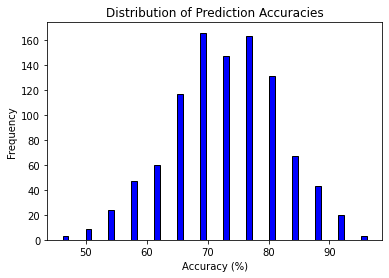

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.30%
Accuracy range: 50% - 60%, Frequency: 8.00%
Accuracy range: 60% - 70%, Frequency: 34.30%
Accuracy range: 70% - 80%, Frequency: 31.00%
Accuracy range: 80% - 90%, Frequency: 24.10%
Accuracy range: 90% - 100%, Frequency: 2.30%


Mean Accuracy: 74.07%
Median Accuracy: 73.08%


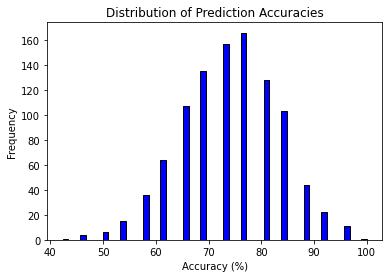

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.50%
Accuracy range: 50% - 60%, Frequency: 5.70%
Accuracy range: 60% - 70%, Frequency: 30.60%
Accuracy range: 70% - 80%, Frequency: 32.30%
Accuracy range: 80% - 90%, Frequency: 27.50%
Accuracy range: 90% - 100%, Frequency: 3.40%


Mean Accuracy: 62.43%
Median Accuracy: 61.54%


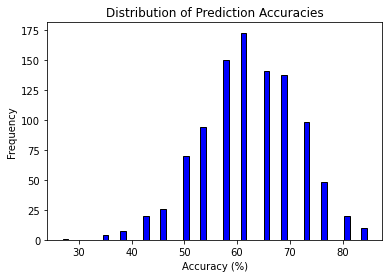

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 1.10%
Accuracy range: 40% - 50%, Frequency: 4.60%
Accuracy range: 50% - 60%, Frequency: 31.40%
Accuracy range: 60% - 70%, Frequency: 45.20%
Accuracy range: 70% - 80%, Frequency: 14.60%
Accuracy range: 80% - 90%, Frequency: 3.00%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 63.99%
Median Accuracy: 65.38%


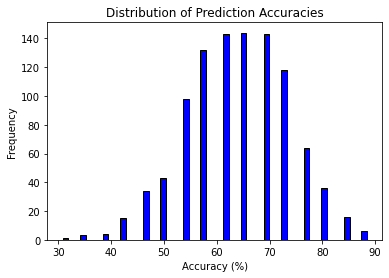

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.80%
Accuracy range: 40% - 50%, Frequency: 4.90%
Accuracy range: 50% - 60%, Frequency: 27.30%
Accuracy range: 60% - 70%, Frequency: 43.00%
Accuracy range: 70% - 80%, Frequency: 18.20%
Accuracy range: 80% - 90%, Frequency: 5.80%
Accuracy range: 90% - 100%, Frequency: 0.00%


Mean Accuracy: 66.35%
Median Accuracy: 65.38%


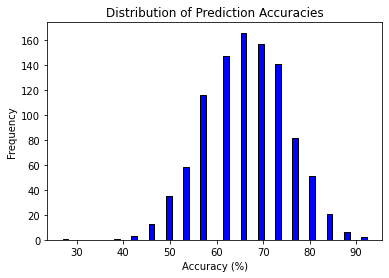

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.10%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 1.60%
Accuracy range: 50% - 60%, Frequency: 20.90%
Accuracy range: 60% - 70%, Frequency: 47.00%
Accuracy range: 70% - 80%, Frequency: 22.30%
Accuracy range: 80% - 90%, Frequency: 7.80%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 68.40%
Median Accuracy: 69.23%


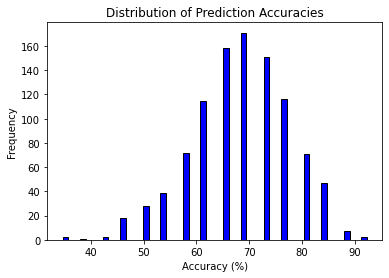

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 2.00%
Accuracy range: 50% - 60%, Frequency: 13.90%
Accuracy range: 60% - 70%, Frequency: 44.40%
Accuracy range: 70% - 80%, Frequency: 26.70%
Accuracy range: 80% - 90%, Frequency: 12.50%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 70.07%
Median Accuracy: 69.23%


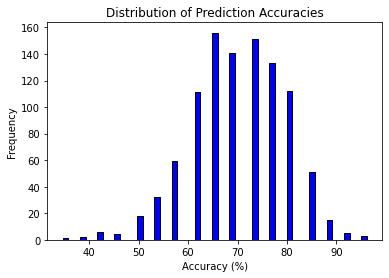

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 1.00%
Accuracy range: 50% - 60%, Frequency: 10.90%
Accuracy range: 60% - 70%, Frequency: 40.80%
Accuracy range: 70% - 80%, Frequency: 28.40%
Accuracy range: 80% - 90%, Frequency: 17.80%
Accuracy range: 90% - 100%, Frequency: 0.80%


Mean Accuracy: 71.74%
Median Accuracy: 73.08%


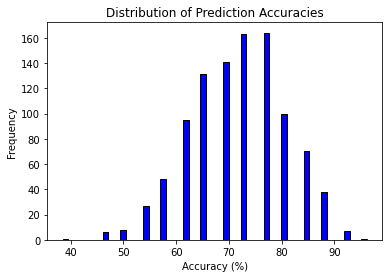

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 0.60%
Accuracy range: 50% - 60%, Frequency: 8.30%
Accuracy range: 60% - 70%, Frequency: 36.70%
Accuracy range: 70% - 80%, Frequency: 32.70%
Accuracy range: 80% - 90%, Frequency: 20.80%
Accuracy range: 90% - 100%, Frequency: 0.80%


Mean Accuracy: 73.55%
Median Accuracy: 73.08%


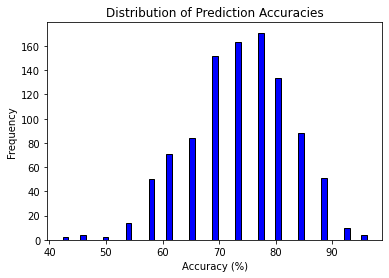

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.60%
Accuracy range: 50% - 60%, Frequency: 6.60%
Accuracy range: 60% - 70%, Frequency: 30.70%
Accuracy range: 70% - 80%, Frequency: 33.40%
Accuracy range: 80% - 90%, Frequency: 27.30%
Accuracy range: 90% - 100%, Frequency: 1.40%


Mean Accuracy: 74.09%
Median Accuracy: 73.08%


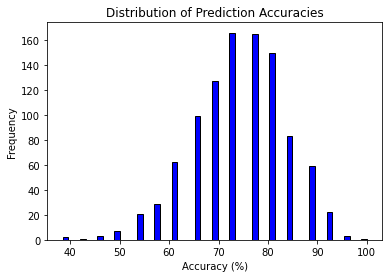

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 0.40%
Accuracy range: 50% - 60%, Frequency: 5.70%
Accuracy range: 60% - 70%, Frequency: 28.80%
Accuracy range: 70% - 80%, Frequency: 33.10%
Accuracy range: 80% - 90%, Frequency: 29.20%
Accuracy range: 90% - 100%, Frequency: 2.60%


Mean Accuracy: 74.60%
Median Accuracy: 76.92%


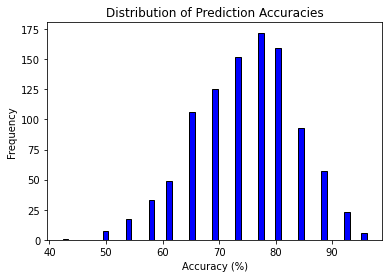

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 5.70%
Accuracy range: 60% - 70%, Frequency: 28.00%
Accuracy range: 70% - 80%, Frequency: 32.40%
Accuracy range: 80% - 90%, Frequency: 30.90%
Accuracy range: 90% - 100%, Frequency: 2.90%


Mean Accuracy: 76.11%
Median Accuracy: 76.92%


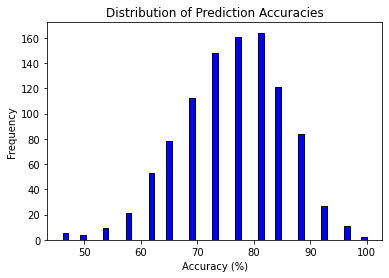

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.50%
Accuracy range: 50% - 60%, Frequency: 3.40%
Accuracy range: 60% - 70%, Frequency: 24.30%
Accuracy range: 70% - 80%, Frequency: 30.90%
Accuracy range: 80% - 90%, Frequency: 36.90%
Accuracy range: 90% - 100%, Frequency: 4.00%


Mean Accuracy: 66.50%
Median Accuracy: 65.38%


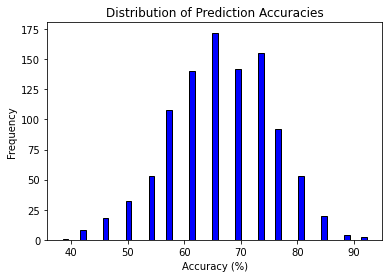

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 2.60%
Accuracy range: 50% - 60%, Frequency: 19.30%
Accuracy range: 60% - 70%, Frequency: 45.40%
Accuracy range: 70% - 80%, Frequency: 24.70%
Accuracy range: 80% - 90%, Frequency: 7.70%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 68.60%
Median Accuracy: 69.23%


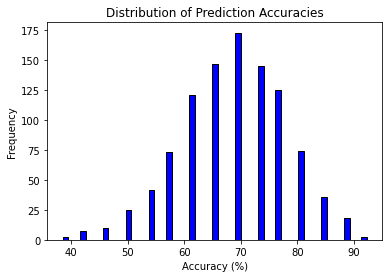

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 1.70%
Accuracy range: 50% - 60%, Frequency: 14.00%
Accuracy range: 60% - 70%, Frequency: 44.10%
Accuracy range: 70% - 80%, Frequency: 27.00%
Accuracy range: 80% - 90%, Frequency: 12.80%
Accuracy range: 90% - 100%, Frequency: 0.20%


Mean Accuracy: 69.79%
Median Accuracy: 69.23%


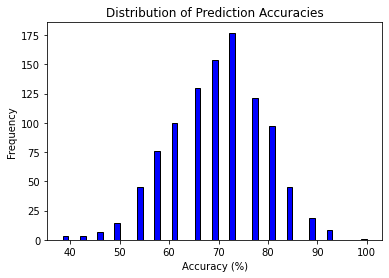

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.30%
Accuracy range: 40% - 50%, Frequency: 1.00%
Accuracy range: 50% - 60%, Frequency: 13.50%
Accuracy range: 60% - 70%, Frequency: 38.40%
Accuracy range: 70% - 80%, Frequency: 29.80%
Accuracy range: 80% - 90%, Frequency: 16.10%
Accuracy range: 90% - 100%, Frequency: 0.90%


Mean Accuracy: 72.00%
Median Accuracy: 73.08%


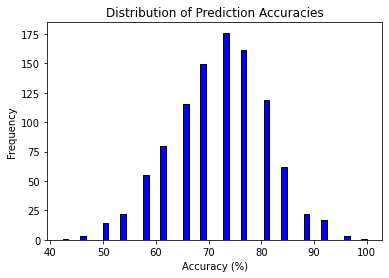

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.40%
Accuracy range: 50% - 60%, Frequency: 9.10%
Accuracy range: 60% - 70%, Frequency: 34.40%
Accuracy range: 70% - 80%, Frequency: 33.70%
Accuracy range: 80% - 90%, Frequency: 20.30%
Accuracy range: 90% - 100%, Frequency: 2.10%


Mean Accuracy: 73.59%
Median Accuracy: 73.08%


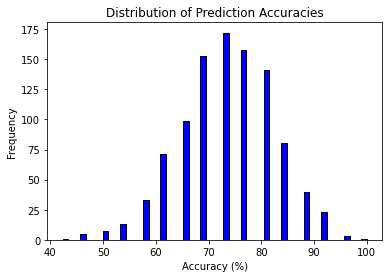

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.60%
Accuracy range: 50% - 60%, Frequency: 5.30%
Accuracy range: 60% - 70%, Frequency: 32.30%
Accuracy range: 70% - 80%, Frequency: 33.00%
Accuracy range: 80% - 90%, Frequency: 26.10%
Accuracy range: 90% - 100%, Frequency: 2.70%


Mean Accuracy: 74.83%
Median Accuracy: 76.92%


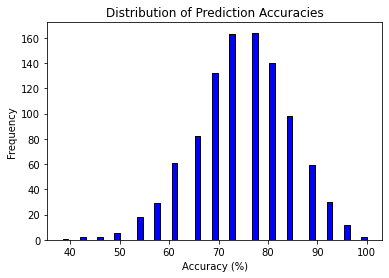

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 0.40%
Accuracy range: 50% - 60%, Frequency: 5.20%
Accuracy range: 60% - 70%, Frequency: 27.50%
Accuracy range: 70% - 80%, Frequency: 32.70%
Accuracy range: 80% - 90%, Frequency: 29.70%
Accuracy range: 90% - 100%, Frequency: 4.40%


Mean Accuracy: 76.79%
Median Accuracy: 76.92%


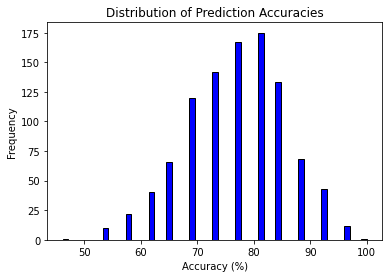

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 3.20%
Accuracy range: 60% - 70%, Frequency: 22.60%
Accuracy range: 70% - 80%, Frequency: 30.90%
Accuracy range: 80% - 90%, Frequency: 37.60%
Accuracy range: 90% - 100%, Frequency: 5.60%


Mean Accuracy: 78.49%
Median Accuracy: 76.92%


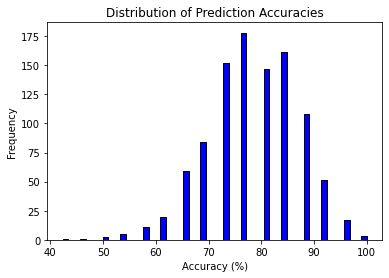

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.20%
Accuracy range: 50% - 60%, Frequency: 1.80%
Accuracy range: 60% - 70%, Frequency: 16.30%
Accuracy range: 70% - 80%, Frequency: 33.00%
Accuracy range: 80% - 90%, Frequency: 41.60%
Accuracy range: 90% - 100%, Frequency: 7.10%


Mean Accuracy: 79.04%
Median Accuracy: 80.77%


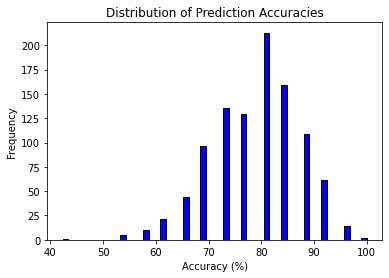

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 1.50%
Accuracy range: 60% - 70%, Frequency: 16.10%
Accuracy range: 70% - 80%, Frequency: 26.50%
Accuracy range: 80% - 90%, Frequency: 48.10%
Accuracy range: 90% - 100%, Frequency: 7.70%


Mean Accuracy: 70.18%
Median Accuracy: 69.23%


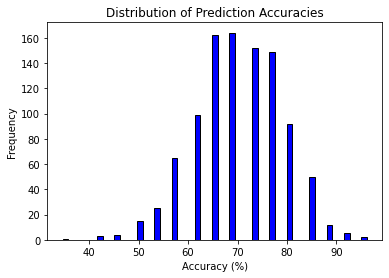

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 0.70%
Accuracy range: 50% - 60%, Frequency: 10.50%
Accuracy range: 60% - 70%, Frequency: 42.50%
Accuracy range: 70% - 80%, Frequency: 30.10%
Accuracy range: 80% - 90%, Frequency: 15.40%
Accuracy range: 90% - 100%, Frequency: 0.70%


Mean Accuracy: 71.60%
Median Accuracy: 73.08%


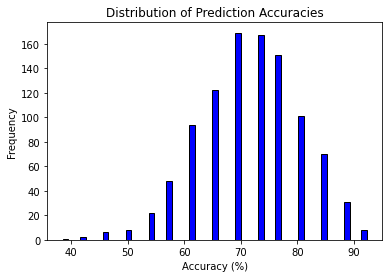

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.10%
Accuracy range: 40% - 50%, Frequency: 0.80%
Accuracy range: 50% - 60%, Frequency: 7.80%
Accuracy range: 60% - 70%, Frequency: 38.50%
Accuracy range: 70% - 80%, Frequency: 31.80%
Accuracy range: 80% - 90%, Frequency: 20.20%
Accuracy range: 90% - 100%, Frequency: 0.80%


Mean Accuracy: 73.63%
Median Accuracy: 73.08%


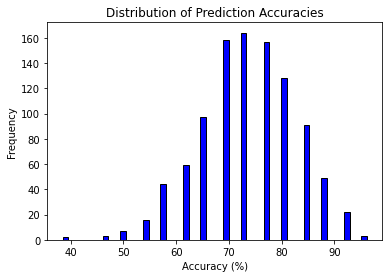

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.20%
Accuracy range: 40% - 50%, Frequency: 0.30%
Accuracy range: 50% - 60%, Frequency: 6.70%
Accuracy range: 60% - 70%, Frequency: 31.40%
Accuracy range: 70% - 80%, Frequency: 32.10%
Accuracy range: 80% - 90%, Frequency: 26.80%
Accuracy range: 90% - 100%, Frequency: 2.50%


Mean Accuracy: 74.63%
Median Accuracy: 73.08%


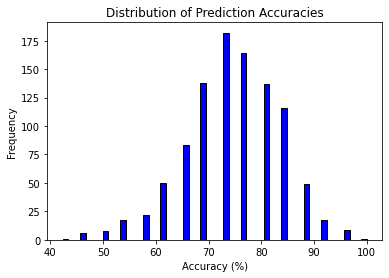

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.70%
Accuracy range: 50% - 60%, Frequency: 4.70%
Accuracy range: 60% - 70%, Frequency: 27.10%
Accuracy range: 70% - 80%, Frequency: 34.60%
Accuracy range: 80% - 90%, Frequency: 30.20%
Accuracy range: 90% - 100%, Frequency: 2.70%


Mean Accuracy: 76.55%
Median Accuracy: 76.92%


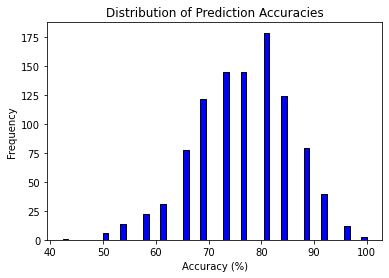

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 4.20%
Accuracy range: 60% - 70%, Frequency: 23.10%
Accuracy range: 70% - 80%, Frequency: 29.00%
Accuracy range: 80% - 90%, Frequency: 38.20%
Accuracy range: 90% - 100%, Frequency: 5.40%


Mean Accuracy: 78.88%
Median Accuracy: 80.77%


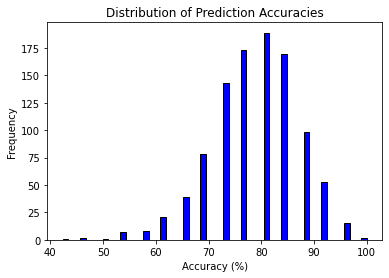

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.30%
Accuracy range: 50% - 60%, Frequency: 1.60%
Accuracy range: 60% - 70%, Frequency: 13.80%
Accuracy range: 70% - 80%, Frequency: 31.60%
Accuracy range: 80% - 90%, Frequency: 45.70%
Accuracy range: 90% - 100%, Frequency: 7.00%


Mean Accuracy: 80.99%
Median Accuracy: 80.77%


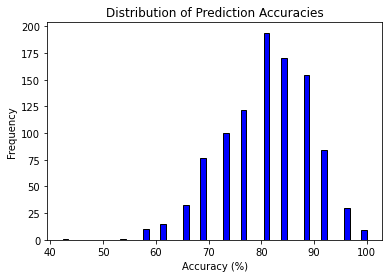

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 1.10%
Accuracy range: 60% - 70%, Frequency: 12.50%
Accuracy range: 70% - 80%, Frequency: 22.20%
Accuracy range: 80% - 90%, Frequency: 51.80%
Accuracy range: 90% - 100%, Frequency: 12.30%


Mean Accuracy: 81.78%
Median Accuracy: 80.77%


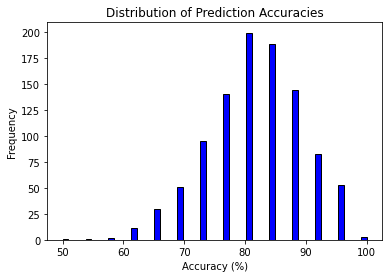

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.40%
Accuracy range: 60% - 70%, Frequency: 9.20%
Accuracy range: 70% - 80%, Frequency: 23.50%
Accuracy range: 80% - 90%, Frequency: 53.10%
Accuracy range: 90% - 100%, Frequency: 13.80%


Mean Accuracy: 73.09%
Median Accuracy: 73.08%


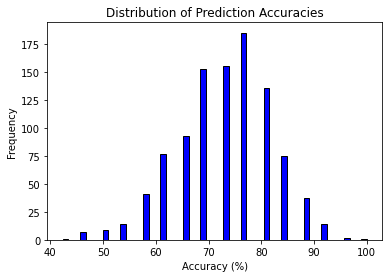

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.80%
Accuracy range: 50% - 60%, Frequency: 6.40%
Accuracy range: 60% - 70%, Frequency: 32.30%
Accuracy range: 70% - 80%, Frequency: 34.00%
Accuracy range: 80% - 90%, Frequency: 24.80%
Accuracy range: 90% - 100%, Frequency: 1.70%


Mean Accuracy: 74.63%
Median Accuracy: 76.92%


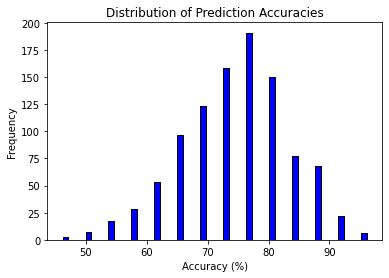

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.30%
Accuracy range: 50% - 60%, Frequency: 5.20%
Accuracy range: 60% - 70%, Frequency: 27.30%
Accuracy range: 70% - 80%, Frequency: 34.90%
Accuracy range: 80% - 90%, Frequency: 29.50%
Accuracy range: 90% - 100%, Frequency: 2.80%


Mean Accuracy: 77.08%
Median Accuracy: 76.92%


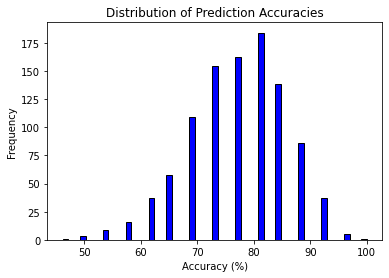

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 2.80%
Accuracy range: 60% - 70%, Frequency: 20.40%
Accuracy range: 70% - 80%, Frequency: 31.60%
Accuracy range: 80% - 90%, Frequency: 40.80%
Accuracy range: 90% - 100%, Frequency: 4.30%


Mean Accuracy: 78.63%
Median Accuracy: 80.77%


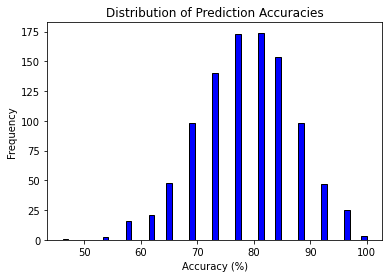

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 1.80%
Accuracy range: 60% - 70%, Frequency: 16.70%
Accuracy range: 70% - 80%, Frequency: 31.30%
Accuracy range: 80% - 90%, Frequency: 42.60%
Accuracy range: 90% - 100%, Frequency: 7.50%


Mean Accuracy: 81.90%
Median Accuracy: 80.77%


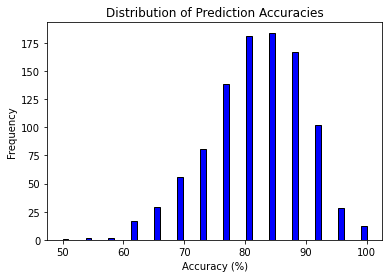

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.50%
Accuracy range: 60% - 70%, Frequency: 10.20%
Accuracy range: 70% - 80%, Frequency: 21.90%
Accuracy range: 80% - 90%, Frequency: 53.20%
Accuracy range: 90% - 100%, Frequency: 14.20%


Mean Accuracy: 83.35%
Median Accuracy: 84.62%


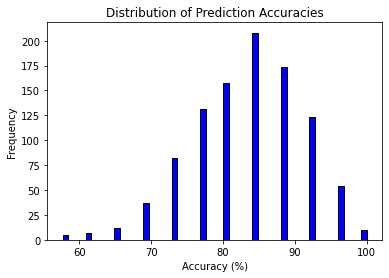

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.50%
Accuracy range: 60% - 70%, Frequency: 5.60%
Accuracy range: 70% - 80%, Frequency: 21.30%
Accuracy range: 80% - 90%, Frequency: 53.90%
Accuracy range: 90% - 100%, Frequency: 18.70%


Mean Accuracy: 85.45%
Median Accuracy: 84.62%


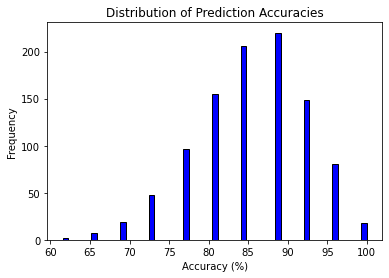

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 2.80%
Accuracy range: 70% - 80%, Frequency: 14.40%
Accuracy range: 80% - 90%, Frequency: 58.10%
Accuracy range: 90% - 100%, Frequency: 24.70%


Mean Accuracy: 76.76%
Median Accuracy: 76.92%


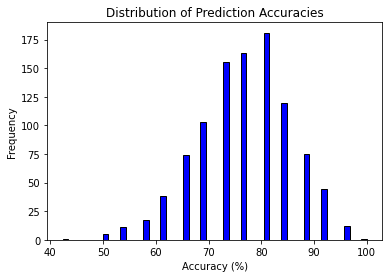

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.10%
Accuracy range: 50% - 60%, Frequency: 3.30%
Accuracy range: 60% - 70%, Frequency: 21.50%
Accuracy range: 70% - 80%, Frequency: 31.80%
Accuracy range: 80% - 90%, Frequency: 37.60%
Accuracy range: 90% - 100%, Frequency: 5.70%


Mean Accuracy: 78.59%
Median Accuracy: 80.77%


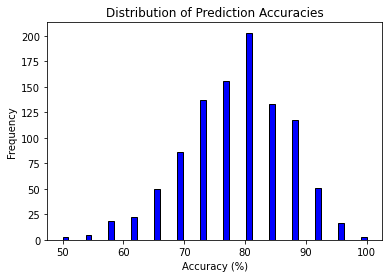

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 2.60%
Accuracy range: 60% - 70%, Frequency: 15.80%
Accuracy range: 70% - 80%, Frequency: 29.30%
Accuracy range: 80% - 90%, Frequency: 45.30%
Accuracy range: 90% - 100%, Frequency: 7.00%


Mean Accuracy: 81.90%
Median Accuracy: 80.77%


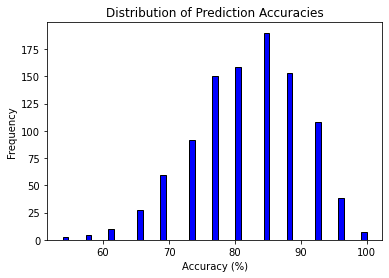

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.70%
Accuracy range: 60% - 70%, Frequency: 9.60%
Accuracy range: 70% - 80%, Frequency: 24.20%
Accuracy range: 80% - 90%, Frequency: 50.20%
Accuracy range: 90% - 100%, Frequency: 15.30%


Mean Accuracy: 84.36%
Median Accuracy: 84.62%


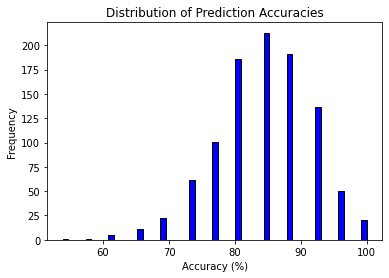

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.20%
Accuracy range: 60% - 70%, Frequency: 3.80%
Accuracy range: 70% - 80%, Frequency: 16.30%
Accuracy range: 80% - 90%, Frequency: 59.00%
Accuracy range: 90% - 100%, Frequency: 20.70%


Mean Accuracy: 85.86%
Median Accuracy: 84.62%


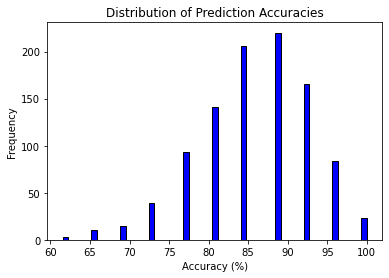

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 2.80%
Accuracy range: 70% - 80%, Frequency: 13.20%
Accuracy range: 80% - 90%, Frequency: 56.70%
Accuracy range: 90% - 100%, Frequency: 27.30%


Mean Accuracy: 87.84%
Median Accuracy: 88.46%


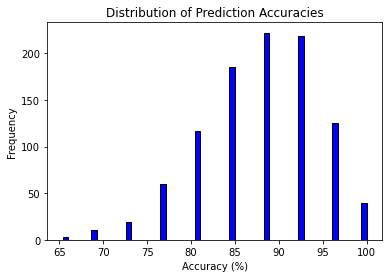

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 1.40%
Accuracy range: 70% - 80%, Frequency: 7.90%
Accuracy range: 80% - 90%, Frequency: 52.40%
Accuracy range: 90% - 100%, Frequency: 38.30%


Mean Accuracy: 80.96%
Median Accuracy: 80.77%


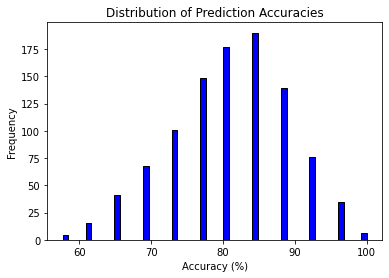

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.40%
Accuracy range: 60% - 70%, Frequency: 12.40%
Accuracy range: 70% - 80%, Frequency: 24.90%
Accuracy range: 80% - 90%, Frequency: 50.60%
Accuracy range: 90% - 100%, Frequency: 11.70%


Mean Accuracy: 83.84%
Median Accuracy: 84.62%


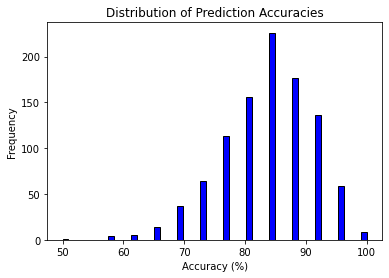

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.50%
Accuracy range: 60% - 70%, Frequency: 5.60%
Accuracy range: 70% - 80%, Frequency: 17.70%
Accuracy range: 80% - 90%, Frequency: 55.90%
Accuracy range: 90% - 100%, Frequency: 20.30%


Mean Accuracy: 85.83%
Median Accuracy: 84.62%


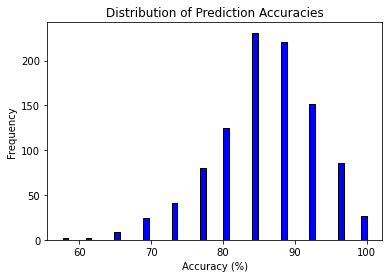

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.20%
Accuracy range: 60% - 70%, Frequency: 3.50%
Accuracy range: 70% - 80%, Frequency: 12.10%
Accuracy range: 80% - 90%, Frequency: 57.70%
Accuracy range: 90% - 100%, Frequency: 26.50%


Mean Accuracy: 87.62%
Median Accuracy: 88.46%


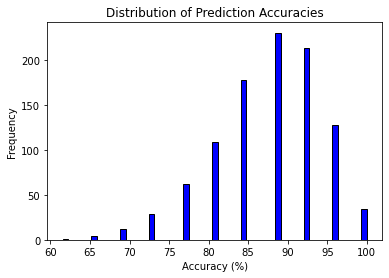

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 1.70%
Accuracy range: 70% - 80%, Frequency: 9.10%
Accuracy range: 80% - 90%, Frequency: 51.70%
Accuracy range: 90% - 100%, Frequency: 37.50%


Mean Accuracy: 88.99%
Median Accuracy: 88.46%


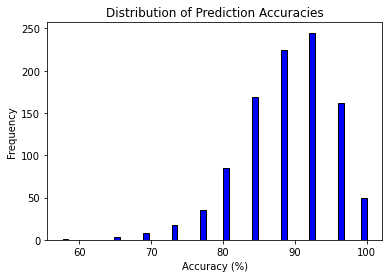

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.10%
Accuracy range: 60% - 70%, Frequency: 1.10%
Accuracy range: 70% - 80%, Frequency: 5.30%
Accuracy range: 80% - 90%, Frequency: 47.80%
Accuracy range: 90% - 100%, Frequency: 45.70%


Mean Accuracy: 85.39%
Median Accuracy: 84.62%


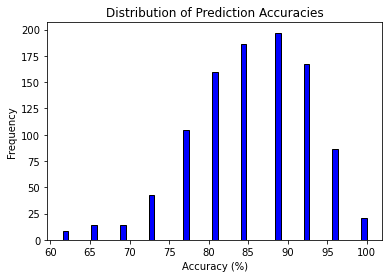

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 3.60%
Accuracy range: 70% - 80%, Frequency: 14.70%
Accuracy range: 80% - 90%, Frequency: 54.30%
Accuracy range: 90% - 100%, Frequency: 27.40%


Mean Accuracy: 87.25%
Median Accuracy: 88.46%


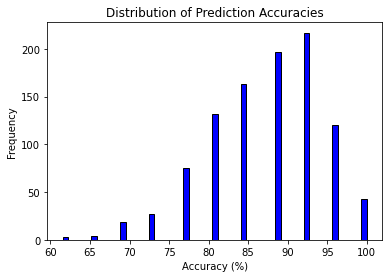

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 2.60%
Accuracy range: 70% - 80%, Frequency: 10.20%
Accuracy range: 80% - 90%, Frequency: 49.20%
Accuracy range: 90% - 100%, Frequency: 38.00%


Mean Accuracy: 89.12%
Median Accuracy: 88.46%


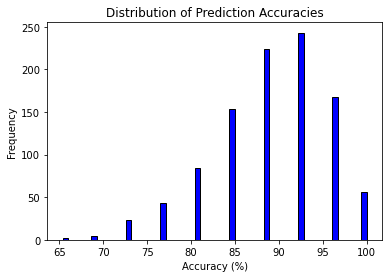

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.60%
Accuracy range: 70% - 80%, Frequency: 6.60%
Accuracy range: 80% - 90%, Frequency: 46.20%
Accuracy range: 90% - 100%, Frequency: 46.60%


Mean Accuracy: 90.92%
Median Accuracy: 92.31%


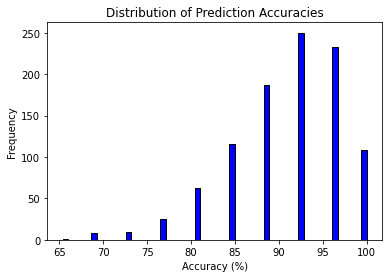

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.90%
Accuracy range: 70% - 80%, Frequency: 3.50%
Accuracy range: 80% - 90%, Frequency: 36.50%
Accuracy range: 90% - 100%, Frequency: 59.10%


Mean Accuracy: 88.47%
Median Accuracy: 88.46%


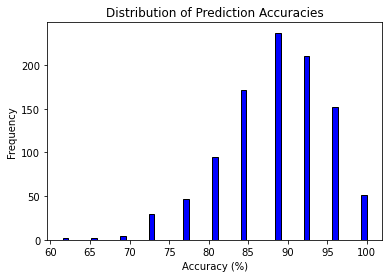

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.80%
Accuracy range: 70% - 80%, Frequency: 7.60%
Accuracy range: 80% - 90%, Frequency: 50.30%
Accuracy range: 90% - 100%, Frequency: 41.30%


Mean Accuracy: 90.48%
Median Accuracy: 92.31%


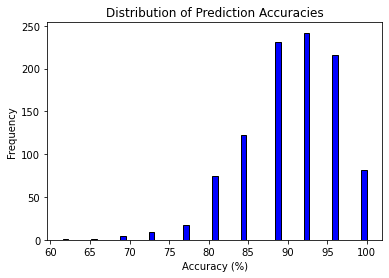

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.70%
Accuracy range: 70% - 80%, Frequency: 2.60%
Accuracy range: 80% - 90%, Frequency: 42.70%
Accuracy range: 90% - 100%, Frequency: 54.00%


Mean Accuracy: 92.00%
Median Accuracy: 92.31%


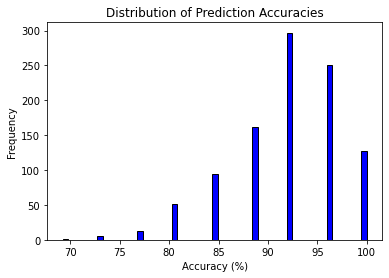

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.10%
Accuracy range: 70% - 80%, Frequency: 1.70%
Accuracy range: 80% - 90%, Frequency: 30.80%
Accuracy range: 90% - 100%, Frequency: 67.40%


Mean Accuracy: 91.25%
Median Accuracy: 92.31%


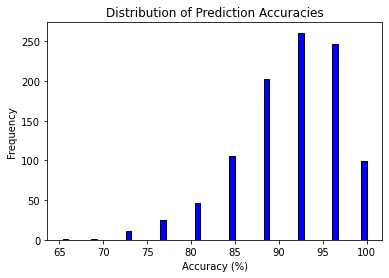

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.20%
Accuracy range: 70% - 80%, Frequency: 3.60%
Accuracy range: 80% - 90%, Frequency: 35.50%
Accuracy range: 90% - 100%, Frequency: 60.70%


Mean Accuracy: 93.11%
Median Accuracy: 92.31%


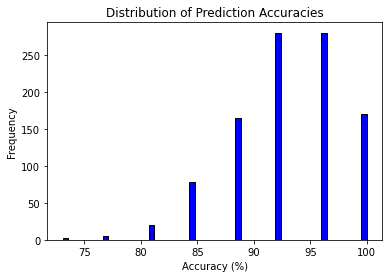

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.00%
Accuracy range: 70% - 80%, Frequency: 0.70%
Accuracy range: 80% - 90%, Frequency: 26.30%
Accuracy range: 90% - 100%, Frequency: 73.00%


Mean Accuracy: 93.54%
Median Accuracy: 96.15%


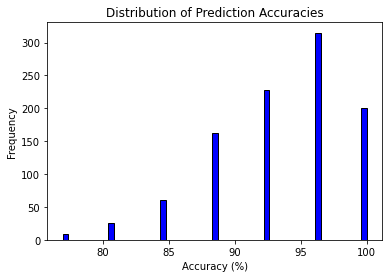

Number of tested sequences of this type: 1000.0
Accuracy range: 0% - 10%, Frequency: 0.00%
Accuracy range: 10% - 20%, Frequency: 0.00%
Accuracy range: 20% - 30%, Frequency: 0.00%
Accuracy range: 30% - 40%, Frequency: 0.00%
Accuracy range: 40% - 50%, Frequency: 0.00%
Accuracy range: 50% - 60%, Frequency: 0.00%
Accuracy range: 60% - 70%, Frequency: 0.00%
Accuracy range: 70% - 80%, Frequency: 0.90%
Accuracy range: 80% - 90%, Frequency: 24.80%
Accuracy range: 90% - 100%, Frequency: 74.30%


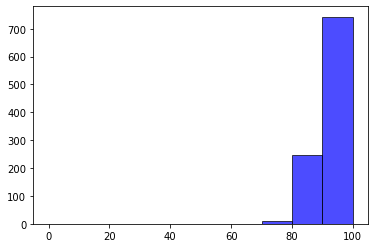

In [8]:
accuracy_results = []

# Evaluation loop for each file pair in the testing dataset
for file in filelist:
    pattern = r'non-shared-lugs(\d+)-overlaps(\d+)'
    match = re.search(pattern, file[1])
    if match:
        non_shared_value,overlaps_value = match.groups()   
        display(HTML(f"<h2>Non-shared lugs: {non_shared_value}. Overlaps: {overlaps_value}</h2>"))
    
    
       
    x = np.load(PATH_TESTING_DATA + '/' + file[0])
    y = np.load(PATH_TESTING_DATA + '/' + file[1])
    
    num_samples_to_select=1000
    if len(x) < num_samples_to_select:
             num_samples_to_select = (len(x))

    random_indices = random.sample(range(len(x)), num_samples_to_select)
    
    x = x[random_indices]
    y = y[random_indices]  
    
    if INPUT_SIZE > x.shape[1]:
        raise UserWarning("Length too short")

    x = x[:,:INPUT_SIZE]
    
    x = np.subtract(x ,65)
    x = np.array(x, dtype='float32')
    x = np.divide(x , 25)
    y = np.array(y, dtype='float32')
    
    

    all_predictions = compute_predictions(x, model_lst)
    correct_counts =  count_correct_predictions(all_predictions, y)
    
    accuracies = [(count / 26) * 100 for count in correct_counts]
    
    # Calculate mean and median of accuracies
    mean_accuracy = np.mean(accuracies)
    median_accuracy = np.median(accuracies)

    # Display mean and median
    pattern = r'overlaps(\d+)-non-shared-lugs(\d+)'
    # Store the results
    accuracy_results.append((overlaps_value, non_shared_value, mean_accuracy, median_accuracy))
        

    print(f"Mean Accuracy: {mean_accuracy:.2f}%")
    print(f"Median Accuracy: {median_accuracy:.2f}%")
   
    plt.clf()  # Clear the previous figure
    plt.hist(accuracies, bins=53, color='blue',  edgecolor='black')
    plt.title("Distribution of Prediction Accuracies")
    plt.xlabel("Accuracy (%)")
    plt.ylabel("Frequency")
    plt.show()
    
    # Second Histogram
    plt.clf()  # Clear the previous figure again before the next plot
    counts, bin_edges, _ = plt.hist(accuracies, bins=range(0, 110, 10), color='blue', alpha=0.7, edgecolor='black')
    total_samples = sum(counts)
    print (f"Number of tested sequences of this type: {total_samples}")  

    # Outputting histogram values as percentages of the total
    for i in range(len(counts)):
        percentage = (counts[i] / total_samples) * 100
        print(f"Accuracy range: {bin_edges[i]}% - {bin_edges[i+1]}%, Frequency: {percentage:.2f}%")  

In [10]:
print("Overlaps | Non-Shared Lugs | Mean Accuracy | Median Accuracy")
print("-" * 50)
for result in accuracy_results:
    print(f"{result[0]} | {result[1]} | {result[2]:.2f}% | {result[3]:.2f}%")

Overlaps | Non-Shared Lugs | Mean Accuracy | Median Accuracy
--------------------------------------------------
1 | 0 | 52.33% | 53.85%
2 | 0 | 51.36% | 50.00%
3 | 0 | 53.66% | 53.85%
4 | 0 | 56.27% | 57.69%
5 | 0 | 57.80% | 57.69%
6 | 0 | 59.47% | 59.62%
7 | 0 | 60.43% | 61.54%
8 | 0 | 61.82% | 61.54%
9 | 0 | 63.43% | 65.38%
10 | 0 | 64.54% | 65.38%
11 | 0 | 66.28% | 65.38%
12 | 0 | 68.96% | 69.23%
0 | 1 | 54.69% | 53.85%
1 | 1 | 54.05% | 53.85%
2 | 1 | 55.70% | 57.69%
3 | 1 | 57.16% | 57.69%
4 | 1 | 59.70% | 61.54%
5 | 1 | 61.80% | 61.54%
6 | 1 | 62.77% | 61.54%
7 | 1 | 64.67% | 65.38%
8 | 1 | 65.28% | 65.38%
9 | 1 | 67.00% | 65.38%
10 | 1 | 68.63% | 69.23%
11 | 1 | 69.76% | 69.23%
12 | 1 | 72.34% | 73.08%
0 | 2 | 55.45% | 57.69%
1 | 2 | 56.95% | 57.69%
2 | 2 | 59.07% | 57.69%
3 | 2 | 61.60% | 61.54%
4 | 2 | 63.22% | 65.38%
5 | 2 | 64.18% | 65.38%
6 | 2 | 66.29% | 65.38%
7 | 2 | 67.57% | 69.23%
8 | 2 | 68.43% | 69.23%
9 | 2 | 69.32% | 69.23%
10 | 2 | 70.69% | 69.23%
11 | 2 | 72.63% |

In [11]:
def load_data(count):

    files = random.sample(filelist, k=count)

    x_lst = []
    y_lst = []

    for file in tqdm.tqdm(files):
        
        x_tmp = np.load(PATH_TESTING_DATA + '/' + file[0])
        y_tmp = np.load(PATH_TESTING_DATA + '/' + file[1])

        if INPUT_SIZE > x_tmp.shape[1]:
            raise UserWarning("Length to height")

        x_tmp = x_tmp[:,:INPUT_SIZE]

        x_lst.append(x_tmp)
        y_lst.append(y_tmp)

    x = np.concatenate(x_lst, axis=0)
    y = np.concatenate(y_lst, axis=0)

    print("calculating float32")
    x = np.subtract(x ,65)
    x = np.array(x, dtype='float32')
    x = np.divide(x , 25)

    y = np.array(y, dtype='float32')

    return x, y

  0%|          | 0/26 [00:00<?, ?it/s]

calculating float32


100%|██████████| 26/26 [06:23<00:00, 14.77s/it]


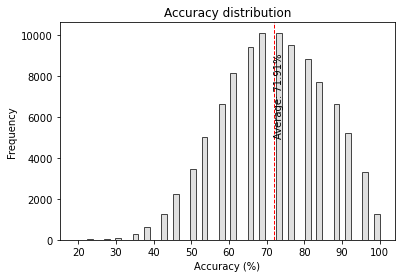

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
# Assume load_data and model_lst are defined elsewhere in your code

def sample_data(X, y, sample_rate=0.01):
    total_samples = len(X)
    sample_size = int(total_samples * sample_rate)
    indices = np.random.choice(total_samples, sample_size, replace=False)
    return X[indices], y[indices]

def compute_predictions(X, model_lst):
    all_predictions = []
    for model in tqdm.tqdm(model_lst):
        model_predictions = model.predict(X).round()  # Round predictions to 0 or 1
        all_predictions.append(model_predictions.flatten())
    return np.array(all_predictions).T  # Transpose so that each row represents a sample

def count_correct_predictions(all_predictions, y, X, model_lst):
    correct_counts = []
    for i in range(len(X)):
        correct_count = 0
        for j, model in enumerate(model_lst):
            if all_predictions[i][j] == y[i][int(model.myname.split('_')[-1].split('.')[0])]:
                correct_count += 1
        correct_counts.append(correct_count)
    return correct_counts

# Assume X, y, and model_lst are properly initialized
#X, y = sample_data(X, y)
X, y = load_data(103)
all_predictions = compute_predictions(X, model_lst)
correct_counts = count_correct_predictions(all_predictions, y, X, model_lst)

# Compute accuracies
accuracies = [(count / len(model_lst)) * 100 for count in correct_counts]

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Plotting the accuracy distribution
counts, bin_edges, _ = plt.hist(accuracies, bins=53, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")

# Show average accuracy on the graph
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, max(counts)/2, f'Average: {average_accuracy:.2f}%', rotation=90)

plt.show()


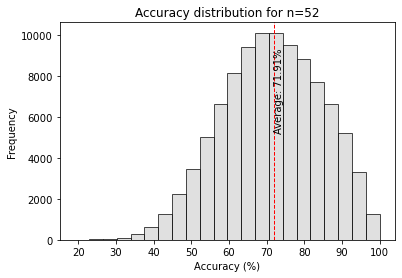

In [13]:
# Adjust the number of bins manually based on your data's characteristics
adjusted_bins = 22  # Example: set to 20, adjust based on your data's distribution
plt.hist(accuracies, bins=adjusted_bins, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution for n=52")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, plt.ylim()[1]/2, f'Average: {average_accuracy:.2f}%', rotation=90)
plt.show()


In [14]:
INPUT_SIZE = 104
PATH_MODELS =os.path.join(PATH_MODELS_PARENT,f"models_seq_{INPUT_SIZE}/")

In [15]:
model_lst = [file for file in os.listdir(PATH_MODELS) if 'best'  in file]
for i in tqdm.tqdm(range(len(model_lst))):
    myname = model_lst[i]
    model_lst[i] = keras.models.load_model(PATH_MODELS+myname)
    model_lst[i].myname = myname

print(len(model_lst))

100%|██████████| 26/26 [00:18<00:00,  1.42it/s]

26


  0%|          | 0/26 [00:00<?, ?it/s]

calculating float32


100%|██████████| 26/26 [06:33<00:00, 15.13s/it]


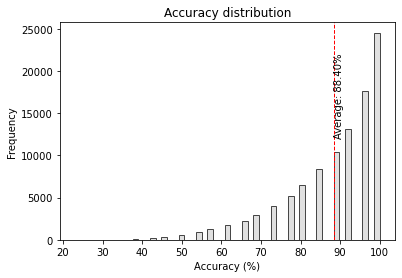

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
# Assume load_data and model_lst are defined elsewhere in your code

def sample_data(X, y, sample_rate=0.01):
    total_samples = len(X)
    sample_size = int(total_samples * sample_rate)
    indices = np.random.choice(total_samples, sample_size, replace=False)
    return X[indices], y[indices]

def compute_predictions(X, model_lst):
    all_predictions = []
    for model in tqdm.tqdm(model_lst):
        model_predictions = model.predict(X).round()  # Round predictions to 0 or 1
        all_predictions.append(model_predictions.flatten())
    return np.array(all_predictions).T  # Transpose so that each row represents a sample

def count_correct_predictions(all_predictions, y, X, model_lst):
    correct_counts = []
    for i in range(len(X)):
        correct_count = 0
        for j, model in enumerate(model_lst):
            if all_predictions[i][j] == y[i][int(model.myname.split('_')[-1].split('.')[0])]:
                correct_count += 1
        correct_counts.append(correct_count)
    return correct_counts

# Assume X, y, and model_lst are properly initialized
#X, y = sample_data(X, y)
X, y = load_data(103)
all_predictions = compute_predictions(X, model_lst)
correct_counts = count_correct_predictions(all_predictions, y, X, model_lst)

# Compute accuracies
accuracies = [(count / len(model_lst)) * 100 for count in correct_counts]

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Plotting the accuracy distribution
counts, bin_edges, _ = plt.hist(accuracies, bins=53, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")

# Show average accuracy on the graph
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, max(counts)/2, f'Average: {average_accuracy:.2f}%', rotation=90)

plt.show()


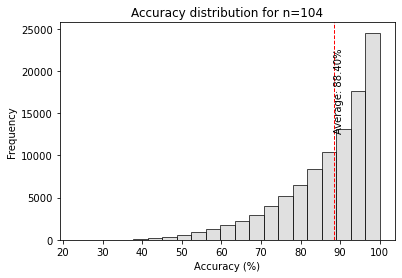

In [17]:
# Adjust the number of bins manually based on your data's characteristics
adjusted_bins = 21  # Example: set to 20, adjust based on your data's distribution
plt.hist(accuracies, bins=adjusted_bins, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution for n=104")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, plt.ylim()[1]/2, f'Average: {average_accuracy:.2f}%', rotation=90)
plt.show()

In [18]:
INPUT_SIZE = 200
PATH_MODELS =os.path.join(PATH_MODELS_PARENT,f"models_seq_{INPUT_SIZE}/")

In [19]:
model_lst = [file for file in os.listdir(PATH_MODELS) if 'best'  in file]
for i in tqdm.tqdm(range(len(model_lst))):
    myname = model_lst[i]
    model_lst[i] = keras.models.load_model(PATH_MODELS+myname)
    model_lst[i].myname = myname

print(len(model_lst))

100%|██████████| 26/26 [00:19<00:00,  1.30it/s]

26


  0%|          | 0/26 [00:00<?, ?it/s]

calculating float32


100%|██████████| 26/26 [06:28<00:00, 14.96s/it]


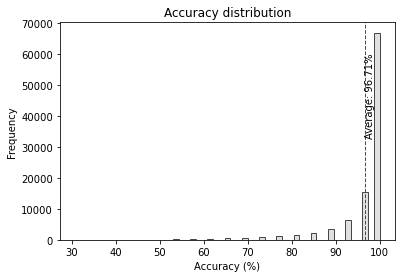

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
# Assume load_data and model_lst are defined elsewhere in your code

def sample_data(X, y, sample_rate=0.01):
    total_samples = len(X)
    sample_size = int(total_samples * sample_rate)
    indices = np.random.choice(total_samples, sample_size, replace=False)
    return X[indices], y[indices]

def compute_predictions(X, model_lst):
    all_predictions = []
    for model in tqdm.tqdm(model_lst):
        model_predictions = model.predict(X).round()  # Round predictions to 0 or 1
        all_predictions.append(model_predictions.flatten())
    return np.array(all_predictions).T  # Transpose so that each row represents a sample

def count_correct_predictions(all_predictions, y, X, model_lst):
    correct_counts = []
    for i in range(len(X)):
        correct_count = 0
        for j, model in enumerate(model_lst):
            if all_predictions[i][j] == y[i][int(model.myname.split('_')[-1].split('.')[0])]:
                correct_count += 1
        correct_counts.append(correct_count)
    return correct_counts

# Assume X, y, and model_lst are properly initialized
#X, y = sample_data(X, y)
X, y = load_data(103)
all_predictions = compute_predictions(X, model_lst)
correct_counts = count_correct_predictions(all_predictions, y, X, model_lst)

# Compute accuracies
accuracies = [(count / len(model_lst)) * 100 for count in correct_counts]

# Calculate average accuracy
average_accuracy = np.mean(accuracies)

# Plotting the accuracy distribution
counts, bin_edges, _ = plt.hist(accuracies, bins=53, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")

# Show average accuracy on the graph
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, max(counts)/2, f'Average: {average_accuracy:.2f}%', rotation=90)

plt.show()

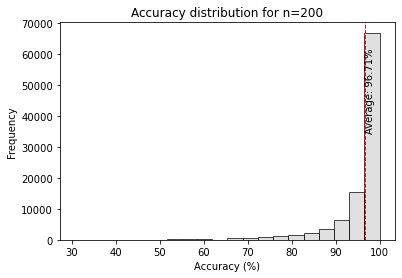

In [21]:
# Adjust the number of bins manually based on your data's characteristics
adjusted_bins = 20  # Example: set to 20, adjust based on your data's distribution
plt.hist(accuracies, bins=adjusted_bins, color='lightgray', alpha=0.7, edgecolor='black')
plt.title("Accuracy distribution for n=200")
plt.xlabel("Accuracy (%)")
plt.ylabel("Frequency")
plt.axvline(average_accuracy, color='red', linestyle='dashed', linewidth=1)
plt.text(average_accuracy, plt.ylim()[1]/2, f'Average: {average_accuracy:.2f}%', rotation=90)
plt.show()

In [22]:
accuracies = [(count / 26) * 100 for count in correct_counts]